In [80]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

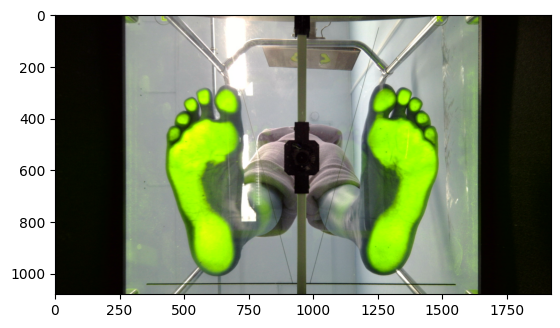

In [6]:
image = cv.imread('/home/dima/Documents/альбрехт/обработка изображений/плантограммы/Img (copy 7).png')

plt.imshow(image)

In [7]:
def split_foot(image):
    leftPad = 280
    rightPad = 1920 - 1630
    assert image.shape == (1080, 1920, 3)
    return image[:,leftPad:880,:], image[:,1025:-rightPad,:]
    

(1080, 600, 3) (1080, 605, 3)


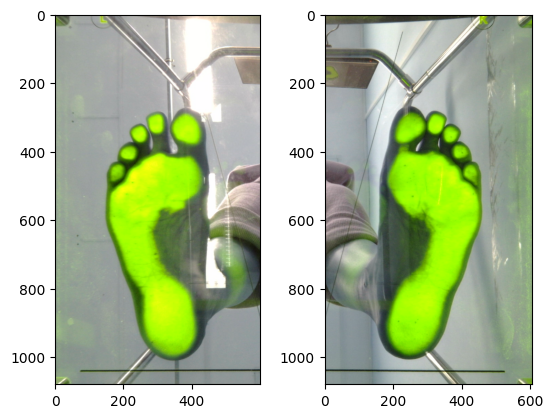

In [8]:
footL, footR = split_foot(image)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(footL)
ax2.imshow(footR)
print(footL.shape, footR.shape)

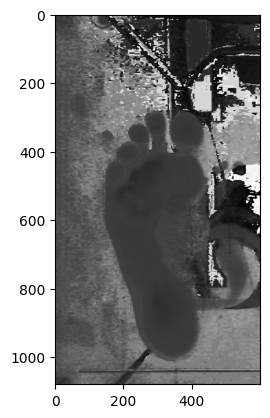

In [46]:
hsv = cv.cvtColor(footL, cv.COLOR_RGB2HSV)
# plt.imshow(cv.absdiff(hsv[...,0], hsv[...,1]), 'gray')
plt.imshow(hsv[...,0], 'gray')

In [48]:
x, y = 200, 300
w, h = 200, 1000
track_window = (x, y, w, h)
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 3 )

# roi = frame[y:y+h, x:x+w]
# hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
hsv_roi = hsv[y:y+h, x:x+w]
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
# plt.imshow(mask, 'gray')
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

# hsv = cv.cvtColor(hsv, cv.COLOR_BGR2HSV)
# while(1):
    # ret, frame = cap.read()
    # hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
    # apply camshift to get the new location
    # ret, track_window = cv.CamShift(dst, track_window, term_crit)
dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
ret, track_window = cv.CamShift(dst, track_window, term_crit)
# Draw it on image
pts = cv.boxPoints(ret)
pts = np.int32(pts)
img2 = cv.polylines(hsv,[pts],True, 255,2)
plt.imshow(img2, 'gray')

# dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
# ret, track_window = cv.meanShift(dst, track_window, term_crit)

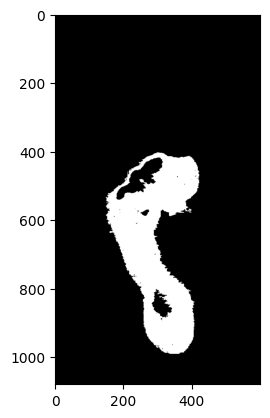

In [54]:
mask = si.segmentation.flood(hsv[...,0], (500, 300), tolerance=3)
plt.imshow(mask, 'gray')

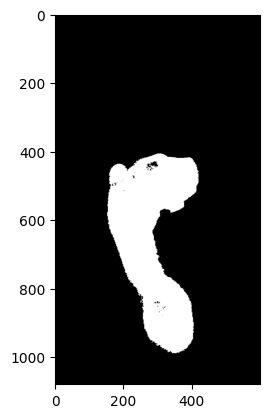

In [69]:
mask = si.segmentation.flood(hsv[...,1], (500, 300), tolerance=10)
# plt.imshow(hsv[...,1], 'gray')
plt.imshow(mask, 'gray')

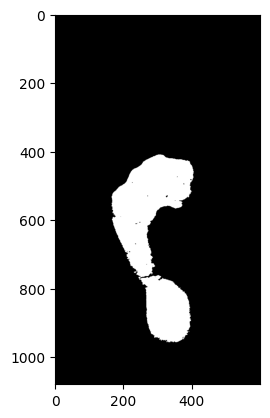

In [110]:
mask = si.segmentation.flood(hsv[...,2], (500, 300), tolerance=10)
# print(mask.astype(np.int32)[100:, 50])
# plt.imshow(hsv[...,2], 'gray')
watershedMask = mask.astype(np.int32)
plt.imshow(watershedMask, 'gray')

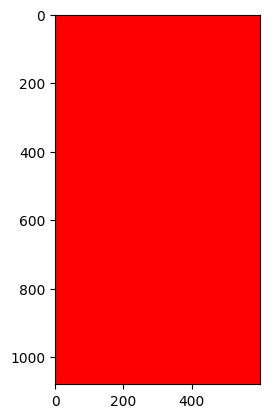

In [127]:
# afterWatershedMask = cv.watershed(footL, watershedMask)
# # afterWatershedMask += 1
# afterWatershedMask = np.add(afterWatershedMask, 1)
# afterWatershedMask = np.floor_divide(afterWatershedMask, 4)
# print(afterWatershedMask)

labels = ski.segmentation.watershed(hsv[...,0], watershedMask)
plt.imshow(ski.color.label2rgb(labels))